In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_raw = pd.read_csv(r'C:\Users\mrjas\Downloads\diabetes.csv')
df_raw

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [75]:
df_raw.describe()
# observation: the minimum values of Glucose, BloodPressure, BMI are zero in the dataset, which is impossible

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
# no missing values in dataset
print(df_raw.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [77]:
# in each column, count how many zeros exist, abnormal values in dataset
# Glucose, BloodPressure, BMI can remove rows with abnomral values, while insulin and SkinThickness are unusable
# since to many rows with zeros(abnormal values), imputation might not hlep, another idea is to create indicator
# for abnormal values, e.g. if value = 0, then 0 else 1. However, it's out of scopr of this essay.
df_raw[df_raw==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [78]:
# find out which rows are with abnormal values and remove them
df_error = df_raw[(df_raw['Glucose']==0) | (df_raw['BloodPressure']==0) | (df_raw['BMI']==0) ]
print('Total count of records with abnormal values is {}'.format(df_error.shape[0]))
print('The indes of recorfs with abnormal values are as follows:')
print(df_error.index)

df_cleaned = df_raw[~df_raw.index.isin(df_error.index)]
print('The original dataset has {} rows, after droping rows with zero in Glucose, BloodPressure, BMI, remianing {} rows'.format(df_raw.shape[0],df_cleaned.shape[0]))
# df_cleaned[df_cleaned==0].count()

Total count of records with abnormal values is 44
The indes of recorfs with abnormal values are as follows:
Int64Index([  7,   9,  15,  49,  60,  75,  78,  81, 145, 172, 182, 193, 222,
            261, 266, 269, 300, 332, 336, 342, 347, 349, 357, 371, 426, 430,
            435, 453, 468, 484, 494, 502, 522, 533, 535, 589, 601, 604, 619,
            643, 684, 697, 703, 706],
           dtype='int64')
The original dataset has 768 rows, after droping rows with zero in Glucose, BloodPressure, BMI, remianing 724 rows


In [79]:
df = df_cleaned.copy()
X = df.copy()
y = X.pop('Outcome')

In [80]:
# define fucntions to calculate mutual information score
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

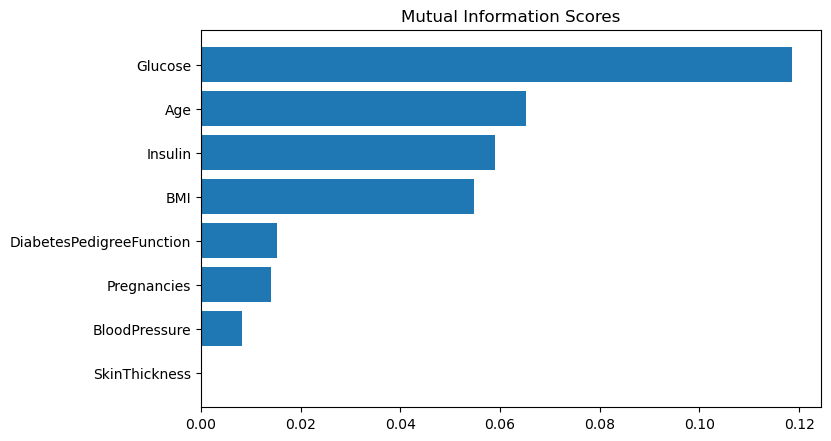

In [81]:
# information score with raw input/independent variavles
mi_scores = make_mi_scores(X, y)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [82]:
# cross examinate with correlation matrix
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


In [83]:
df_corr[df_corr>0.3]
# according to correaltion matrix, select Glucose, BMI, Age as input varibales, these variables are not quite correlated

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.557066,NaN
Glucose,NaN,1.000000,NaN,NaN,0.337896,NaN,NaN,NaN,0.488384
BloodPressure,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.324897,NaN
SkinThickness,NaN,NaN,NaN,1.000000,0.420874,0.401528,NaN,NaN,NaN
Insulin,NaN,0.337896,NaN,0.420874,1.000000,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,0.401528,NaN,1.000000,NaN,NaN,NaN
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,0.557066,NaN,0.324897,NaN,NaN,NaN,NaN,1.000000,NaN
Outcome,NaN,0.488384,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


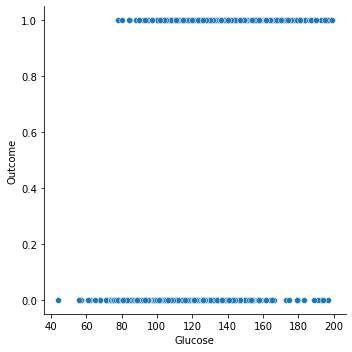

In [84]:
sns.relplot(x="Glucose", y="Outcome", data=df);

<AxesSubplot:ylabel='Frequency'>

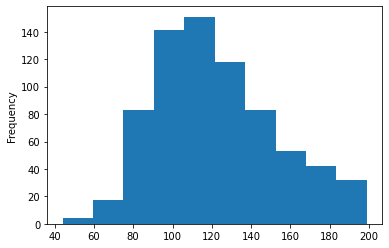

In [85]:
df['Glucose'].plot(kind='hist')

In [86]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X = X.loc[:,['Glucose','BMI','Age']]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())

# conclusion: the model is valid with high F score, and F-statistic is much less that 5%
# enough to reject null hypothsis: the model is not significant, which means it's a sinificant model
# however, the adj R square is quite low, only .29, meaning only 29% of variance is explained by this model
# raw data is continous variables, unable to conduct anova test, have to bin the input variables

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     99.64
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           5.97e-54
Time:                        21:28:02   Log-Likelihood:                -362.66
No. Observations:                 724   AIC:                             733.3
Df Residuals:                     720   BIC:                             751.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0647      0.090    -11.883      0.0

E:\IDE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [90]:
# step 2: catergorical variables
# define function to binning continuous varibales into categorical onces with 3 levels (low, medium, high)
# becase the dataset will be test with N way ANOVA, ensure the binning are balanced, meaning under each catergory, 
# the counts are the same
# data transformation conpleted
def df_binning(col,df):
    bin_labels = [1,2,3]
    new_col = col + '_bin'
    df[new_col] = pd.qcut(df[col].rank(method='first'),
                          q=3,
                          labels=bin_labels, duplicates='drop')
    df[new_col] = df[new_col].astype('int')

    
df = df_cleaned.copy()
X = df.copy()
y = X.pop('Outcome')

cols = X.columns
for col in cols:
    # print(col)
    df_binning(col,X)

In [91]:
X_bin = X.loc[:,'Pregnancies_bin':'Age_bin']
df_bin = pd.concat([X_bin,y],axis = 1)
df_bin

,Pregnancies_bin,Glucose_bin,BloodPressure_bin,SkinThickness_bin,Insulin_bin,BMI_bin,DiabetesPedigreeFunction_bin,Age_bin,Outcome
0,3,3,2,3,1,2,3,3,1
1,1,1,1,2,1,1,2,2,0
2,3,3,1,1,1,1,3,2,1
3,1,1,1,2,2,1,1,1,0
4,1,3,1,3,3,3,3,2,1
...,...,...,...,...,...,...,...,...,...
763,3,1,2,3,3,2,1,3,0
764,2,2,2,2,2,3,2,2,0
765,3,2,2,2,3,1,1,2,0
766,1,2,1,1,2,2,2,3,1


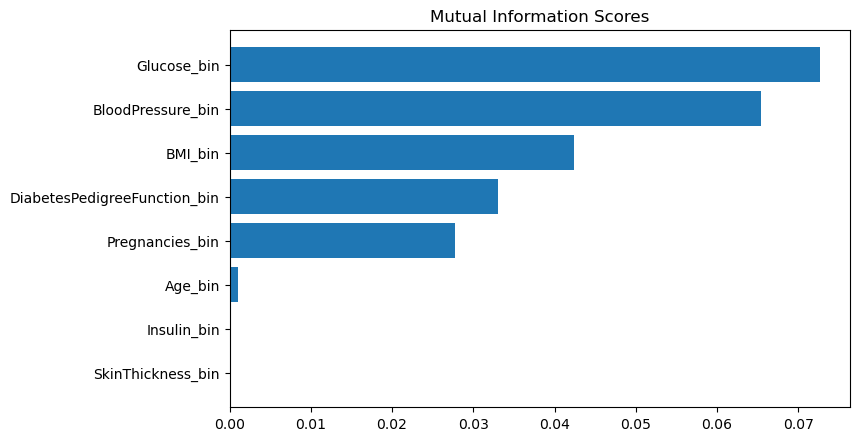

In [92]:
# information score with transformed input/independent variavles
mi_scores_bin = make_mi_scores(X_bin, y)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores_bin)

In [93]:
df_bin_corr = df_bin.corr()
df_bin_corr

,Pregnancies_bin,Glucose_bin,BloodPressure_bin,SkinThickness_bin,Insulin_bin,BMI_bin,DiabetesPedigreeFunction_bin,Age_bin,Outcome
Pregnancies_bin,1.000000,0.140784,0.180122,-0.047622,-0.093171,0.018631,-0.028988,0.567287,0.200584
Glucose_bin,0.140784,1.000000,0.242234,0.039335,0.173911,0.151136,0.062109,0.244304,0.428424
BloodPressure_bin,0.180122,0.242234,1.000000,0.060039,-0.045552,0.267079,0.006208,0.341613,0.161424
SkinThickness_bin,-0.047622,0.039335,0.060039,1.000000,0.432711,0.391303,0.122151,-0.064185,0.104464
Insulin_bin,-0.093171,0.173911,-0.045552,0.432711,1.000000,0.153207,0.163559,-0.099382,0.100904
BMI_bin,0.018631,0.151136,0.267079,0.391303,0.153207,1.000000,0.101447,0.130432,0.268224
DiabetesPedigreeFunction_bin,-0.028988,0.062109,0.006208,0.122151,0.163559,0.101447,1.000000,-0.006214,0.168544
Age_bin,0.567287,0.244304,0.341613,-0.064185,-0.099382,0.130432,-0.006214,1.000000,0.286024
Outcome,0.200584,0.428424,0.161424,0.104464,0.100904,0.268224,0.168544,0.286024,1.000000


In [94]:
# look for colinearity
df_bin_corr[df_bin_corr>=0.3]
# according to correaltion matrix, select Glucose, Age, BMI as input varibales, these variables are not quite correlated

,Pregnancies_bin,Glucose_bin,BloodPressure_bin,SkinThickness_bin,Insulin_bin,BMI_bin,DiabetesPedigreeFunction_bin,Age_bin,Outcome
Pregnancies_bin,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.567287,NaN
Glucose_bin,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.428424
BloodPressure_bin,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.341613,NaN
SkinThickness_bin,NaN,NaN,NaN,1.000000,0.432711,0.391303,NaN,NaN,NaN
Insulin_bin,NaN,NaN,NaN,0.432711,1.000000,NaN,NaN,NaN,NaN
BMI_bin,NaN,NaN,NaN,0.391303,NaN,1.000000,NaN,NaN,NaN
DiabetesPedigreeFunction_bin,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age_bin,0.567287,NaN,0.341613,NaN,NaN,NaN,NaN,1.000000,NaN
Outcome,NaN,0.428424,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [95]:
X_bin = df_bin.loc[:,['Glucose_bin','BMI_bin','Age_bin']]
X2 = sm.add_constant(X_bin)
est = sm.OLS(y, X2).fit()
print(est.summary())

# conclusion: the model is valid with high F score, and F-statistic is much less that 5%
# enough to reject null hypothsis: the model is not significant, which means it's a sinificant model
# however, the adj R square is quite low, only .251, meaning only 25.1% of variance is explained by this model

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     81.74
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.62e-45
Time:                        21:30:36   Log-Likelihood:                -382.26
No. Observations:                 724   AIC:                             772.5
Df Residuals:                     720   BIC:                             790.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4958      0.058     -8.567      

E:\IDE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [96]:
# ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Outcome ~ C(Glucose_bin) + C(BMI_bin) + C(Age_bin)', data=df_bin).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Glucose_bin),19.412333,2.0,57.798619,5.341732e-24
C(BMI_bin),6.131153,2.0,18.255003,1.850130e-08
C(Age_bin),4.482970,2.0,13.347674,2.034636e-06
Residual,120.406362,717.0,NaN,NaN


In [97]:
# post hoc analysis for Glucose_bin
import scikit_posthocs as sp
sp.posthoc_ttest(df_bin, val_col='Outcome', group_col='Glucose_bin', p_adjust='holm')

,3,1,2
3,1.000000e+00,7.897425e-34,5.203816e-13
1,7.897425e-34,1.000000e+00,1.718997e-06
2,5.203816e-13,1.718997e-06,1.000000e+00


In [98]:
# post hoc analysis for BMI
sp.posthoc_ttest(df_bin, val_col='Outcome', group_col='BMI_bin', p_adjust='holm')

,2,1,3
2,1.000000e+00,1.477001e-10,2.717663e-01
1,1.477001e-10,1.000000e+00,7.328896e-14
3,2.717663e-01,7.328896e-14,1.000000e+00


In [99]:
# post hoc analysis for Age
sp.posthoc_ttest(df_bin, val_col='Outcome', group_col='Age_bin', p_adjust='holm')

,3,2,1
3,1.000000e+00,4.318177e-03,3.566413e-15
2,4.318177e-03,1.000000e+00,6.018861e-07
1,3.566413e-15,6.018861e-07,1.000000e+00
